In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
taxi_df = pd.read_csv("Taxi_train.csv",nrows=100000)
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                100000 non-null  object 
 1   fare_amount        100000 non-null  float64
 2   pickup_datetime    100000 non-null  object 
 3   pickup_longitude   100000 non-null  float64
 4   pickup_latitude    100000 non-null  float64
 5   dropoff_longitude  100000 non-null  float64
 6   dropoff_latitude   100000 non-null  float64
 7   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.1+ MB


In [3]:
taxi_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [4]:
taxi_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
taxi_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


### The taxi fare amount is negative looks like there is an error recording 

In [6]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                100000 non-null  object 
 1   fare_amount        100000 non-null  float64
 2   pickup_datetime    100000 non-null  object 
 3   pickup_longitude   100000 non-null  float64
 4   pickup_latitude    100000 non-null  float64
 5   dropoff_longitude  100000 non-null  float64
 6   dropoff_latitude   100000 non-null  float64
 7   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.1+ MB


In [7]:
#convert the pickupdatetime columns into Datetime format
taxi_df["pickup_datetime"] = pd.to_datetime(taxi_df["pickup_datetime"])

In [8]:
taxi_df["year"] = taxi_df["pickup_datetime"].dt.year
taxi_df["month"] = taxi_df["pickup_datetime"].dt.month
taxi_df["date"] = taxi_df["pickup_datetime"].dt.date
taxi_df["hour"] = taxi_df["pickup_datetime"].dt.hour
taxi_df["day"] = taxi_df["pickup_datetime"].dt.day
taxi_df["weekday"] = taxi_df["pickup_datetime"].dt.weekday

In [9]:
taxi_df[["pickup_datetime","year","month","date","day","hour","weekday"]].head()

,pickup_datetime,year,month,date,day,hour,weekday
0,2009-06-15 17:26:21+00:00,2009,6,2009-06-15,15,17,0
1,2010-01-05 16:52:16+00:00,2010,1,2010-01-05,5,16,1
2,2011-08-18 00:35:00+00:00,2011,8,2011-08-18,18,0,3
3,2012-04-21 04:30:42+00:00,2012,4,2012-04-21,21,4,5
4,2010-03-09 07:51:00+00:00,2010,3,2010-03-09,9,7,1


In [10]:
import math
 
# Python 3 program for the
# haversine formula
def haversine(lat1, lon1, lat2, lon2):
     
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

In [11]:
#calculate the haversine distance between the pickup and drop pff points
taxi_df['distance'] = taxi_df.apply(lambda row: haversine(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

In [12]:
taxi_df.drop(["key","pickup_datetime"],axis=1,inplace=True)

In [13]:
# Filter out rows with invalid latitude and longitude values
valid_latitude_range = (-90, 90)
valid_longitude_range = (-180, 180)


taxi_df = taxi_df[(taxi_df['pickup_latitude'].between(*valid_latitude_range)) &
            (taxi_df['pickup_longitude'].between(*valid_longitude_range)) &
            (taxi_df['dropoff_latitude'].between(*valid_latitude_range)) &
            (taxi_df['dropoff_longitude'].between(*valid_longitude_range))]

In [14]:
taxi_df = taxi_df[taxi_df["fare_amount"]>0]

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

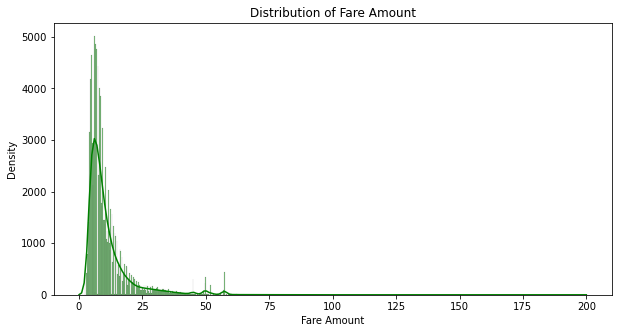

In [16]:
figure = plt.figure(figsize=(10,5))
ax = sns.histplot(x="fare_amount",data = taxi_df,kde=True,color='g')
ax.set_title("Distribution of Fare Amount")
ax.set_xlabel("Fare Amount")
ax.set_ylabel("Density")
plt.show()

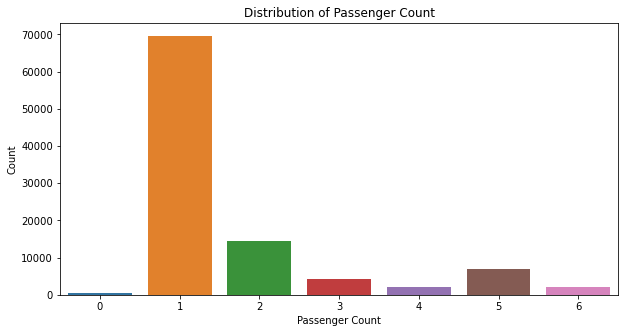

In [17]:
figure = plt.figure(figsize=(10,5))
ax = sns.countplot(x="passenger_count",data = taxi_df)
ax.set_title("Distribution of Passenger Count")
ax.set_xlabel("Passenger Count")
ax.set_ylabel("Count")
plt.show()

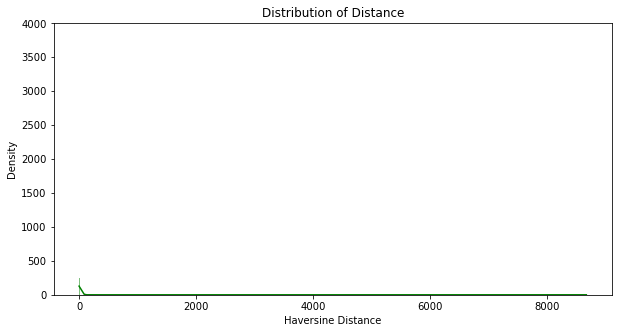

In [18]:
figure = plt.figure(figsize=(10,5))
ax = sns.histplot(x="distance",data = taxi_df,kde=True,color='g')
ax.set_title("Distribution of Distance")
ax.set_xlabel("Haversine Distance")
ax.set_ylabel("Density")
plt.show()

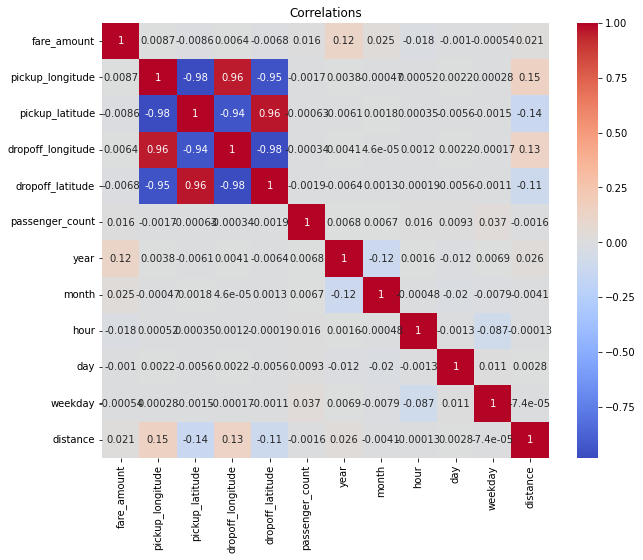

In [19]:
correlations = taxi_df.corr()
figure = plt.figure(figsize=(10,8))
ax = sns.heatmap(correlations,cmap="coolwarm",annot=True,fmt='.2g')
ax.set_title("Correlations")
plt.show()

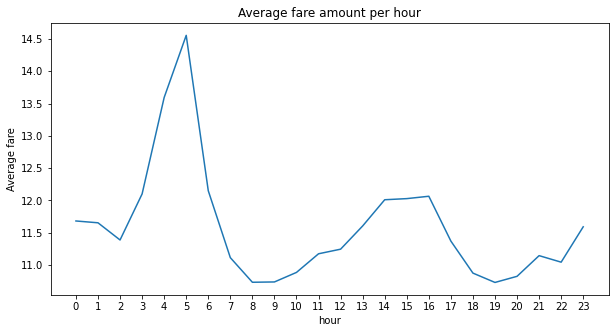

In [20]:
figure = plt.figure(figsize=(10,5))
avg_fare_amount_per_hour = taxi_df.groupby("hour")["fare_amount"].mean().reset_index()
ax = sns.lineplot(x="hour",y="fare_amount",data=avg_fare_amount_per_hour)
hours= avg_fare_amount_per_hour["hour"]
ax.set_xticks(ticks=hours)
ax.set_title("Average fare amount per hour")
ax.set_ylabel("Average fare")
plt.show()

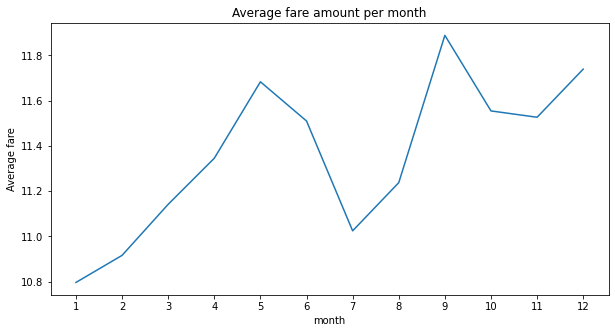

In [21]:
figure = plt.figure(figsize=(10,5))
avg_fare_amount_per_month = taxi_df.groupby("month")["fare_amount"].mean().reset_index()
ax = sns.lineplot(x="month",y="fare_amount",data=avg_fare_amount_per_month)
months= avg_fare_amount_per_month["month"]
ax.set_xticks(ticks=months)
ax.set_title("Average fare amount per month")
ax.set_ylabel("Average fare")
plt.show()

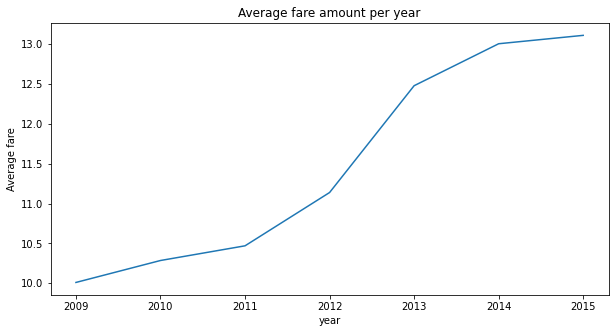

In [22]:
figure = plt.figure(figsize=(10,5))
avg_fare_amount_per_year = taxi_df.groupby("year")["fare_amount"].mean().reset_index()
ax = sns.lineplot(x="year",y="fare_amount",data=avg_fare_amount_per_year)
years= avg_fare_amount_per_year["year"]
ax.set_xticks(ticks=years)
ax.set_title("Average fare amount per year")
ax.set_ylabel("Average fare")
plt.show()

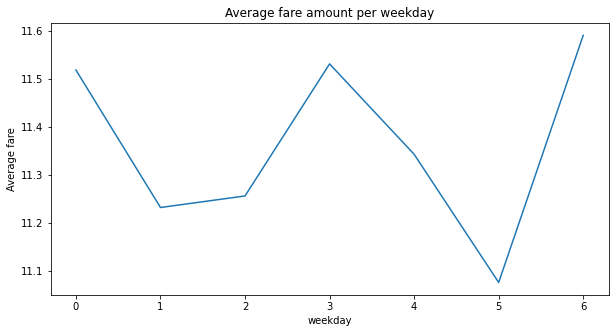

In [23]:
figure = plt.figure(figsize=(10,5))
avg_fare_amount_per_weekday = taxi_df.groupby("weekday")["fare_amount"].mean().reset_index()
ax = sns.lineplot(x="weekday",y="fare_amount",data=avg_fare_amount_per_weekday)
weekdays= avg_fare_amount_per_weekday["weekday"]
ax.set_xticks(ticks=weekdays)
ax.set_title("Average fare amount per weekday")
ax.set_ylabel("Average fare")
plt.show()

In [24]:
# Remove outliers (assuming data has already been cleaned for missing values and invalid coordinates)
taxi_df = taxi_df[(taxi_df['fare_amount'].between(1, 200)) &
            (taxi_df['distance'].between(0.1, 100)) &
            (taxi_df['passenger_count'].between(1, 6))]

In [25]:
print("Number of records after cleaning the data:",len(taxi_df))

Number of records after cleaning the data: 95913


In [26]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
sc = StandardScaler()
ohe = OneHotEncoder()
x_std = sc.fit_transform(taxi_df[['passenger_count',"distance"]])
x_ohe = ohe.fit_transform(taxi_df[['year','month','hour','day', 'weekday']]).toarray()

In [27]:
std_col_df = pd.DataFrame(data = x_std,columns=sc.get_feature_names_out())
ohe_col_df = pd.DataFrame(data = x_ohe,columns=ohe.get_feature_names_out())

In [28]:
std_col_df.shape

(95913, 2)

In [29]:
ohe_col_df.shape

(95913, 81)

In [30]:
X = pd.concat([std_col_df,ohe_col_df],axis = 1)
y = taxi_df["fare_amount"]
print("X shape",X.shape)

X shape (95913, 83)


In [31]:
from sklearn.model_selection import train_test_split,GridSearchCV

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_test)

In [34]:
training_r2 = lr.score(X_train,y_train)
testing_r2 = lr.score(X_test,y_test)

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2:",np.round(r2,2))

R2: 0.79


In [36]:
print("Traing accuracy:",np.round(training_r2,2))
print("Testing accuracy:",np.round(testing_r2,2))

Traing accuracy: 0.73
Testing accuracy: 0.79


In [37]:
## Ridge Regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [38]:
y_pred = ridge_model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print("R2:",np.round(r2,2))

R2: 0.79


In [39]:
ridge_params = {
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
grid_search= GridSearchCV(ridge_model,param_grid=ridge_params,scoring="neg_root_mean_squared_error",n_jobs=-1,cv=3)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 1, 10, 100],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_root_mean_squared_error')

In [41]:
grid_search_df=pd.DataFrame(grid_search.cv_results_)
grid_search_df.to_excel("1_Linear_model_Gridsearch_results.xlsx")

In [42]:
# {'alpha': 100, 'solver': 'sag'}
grid_search.best_estimator_

Ridge(alpha=100, solver='sag')

In [43]:
print("Best Model Parameters:",grid_search.best_params_)

Best Model Parameters: {'alpha': 100, 'solver': 'sag'}


In [44]:
best_ridge_model = Ridge(random_state=42,alpha= 100, solver= 'sag')
best_ridge_model.fit(X_train,y_train)

Ridge(alpha=100, random_state=42, solver='sag')

In [45]:
y_pred_best = best_ridge_model.predict(X_test)

In [46]:
training_r2 = best_ridge_model.score(X_train,y_train)
testing_r2 = best_ridge_model.score(X_test,y_test)
print("Traing accuracy:",np.round(training_r2,2))
print("Testing accuracy:",np.round(testing_r2,2))

Traing accuracy: 0.73
Testing accuracy: 0.79
